# Линейные модели, SVM и деревья решений.

Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.

### Задание:


    Выберите набор данных (датасет) для решения задачи классификации или регрессии.

    В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

    С использованием метода train_test_split разделите выборку на обучающую и тестовую.
    Обучите следующие модели:

        1 одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, 
        2 логистическую регрессию при решении задачи классификации);
        3 SVM;
        4 дерево решений.
        
    Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.

    Постройте график, показывающий важность признаков в дереве решений.

    Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from io import StringIO
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, average_precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

%matplotlib inline 
sns.set(style="ticks")

# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
df = data.sample(n=2000)

In [4]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    1003
1.0     997
Name: count, dtype: int64

In [5]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
10740,0.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,4.0,4.0
67472,1.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,2.0,2.0,0.0,1.0,8.0,4.0,8.0
41447,1.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,12.0,3.0,3.0
54205,1.0,1.0,1.0,1.0,31.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,3.0,10.0,5.0,0.0,1.0,10.0,4.0,5.0
38043,1.0,1.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,4.0,7.0


In [6]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.498500,0.571000,0.521000,0.97000,29.864500,0.456500,0.063000,0.160000,0.728500,0.609000,...,0.960000,0.096000,2.829500,3.838000,5.477500,0.245000,0.457000,8.56500,4.934500,5.730500
std,0.500123,0.495057,0.499684,0.17063,7.119374,0.498229,0.243024,0.366698,0.444845,0.488096,...,0.196008,0.294665,1.100016,8.264436,9.819812,0.430195,0.498272,2.95908,1.015739,2.170766
min,0.000000,0.000000,0.000000,0.00000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.00000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.00000,4.000000,4.000000
50%,0.000000,1.000000,1.000000,1.00000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.00000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.00000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,5.000000,0.000000,1.000000,11.00000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.00000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.00000,6.000000,8.000000


In [7]:
print("Размер набора:")
print(f'В датасете {df.shape[0]} строк и {df.shape[1]} колонок.')

Размер набора:
В датасете 2000 строк и 22 колонок.


In [8]:
df = df.astype('int')

In [9]:
X = df.drop('Diabetes_binary', axis=1)
Y = df['Diabetes_binary']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(1400, 21), (600, 21)
(1400,), (600,)


In [11]:
SVC1 = SVC()
SVC1.fit(X_train, Y_train)

SVC()

In [12]:
print(recall_score(Y_test, SVC1.predict(X_test)))
print(precision_score(Y_test, SVC1.predict(X_test)))

0.7684563758389261
0.720125786163522


In [13]:
LR1 = LogisticRegression()
LR1.fit(X_train, Y_train)

LogisticRegression()

In [14]:
print(recall_score(Y_test, LR1.predict(X_test)))
print(precision_score(Y_test, LR1.predict(X_test)))

0.7550335570469798
0.7377049180327869


In [15]:
DT1 = DecisionTreeClassifier()
DT1.fit(X_train, Y_train)

DecisionTreeClassifier()

In [16]:
print(recall_score(Y_test, DT1.predict(X_test)))
print(precision_score(Y_test, DT1.predict(X_test)))

0.6409395973154363
0.6631944444444444


In [17]:
list(zip(X.columns.values, DT1.feature_importances_))

[('HighBP', 0.09560051948645341),
 ('HighChol', 0.020718199824518974),
 ('CholCheck', 0.0),
 ('BMI', 0.13934708780726524),
 ('Smoker', 0.009142078351994036),
 ('Stroke', 0.003442513060208794),
 ('HeartDiseaseorAttack', 0.016887229572886474),
 ('PhysActivity', 0.015015840921253154),
 ('Fruits', 0.01772079286895456),
 ('Veggies', 0.020266312983816447),
 ('HvyAlcoholConsump', 0.006853284143134312),
 ('AnyHealthcare', 0.009753485553517597),
 ('NoDocbcCost', 0.007729897275195307),
 ('GenHlth', 0.1905241766673849),
 ('MentHlth', 0.035067967222329625),
 ('PhysHlth', 0.0765082429215202),
 ('DiffWalk', 0.03349022648457509),
 ('Sex', 0.043742079301408394),
 ('Age', 0.11086309619690679),
 ('Education', 0.061435272695986164),
 ('Income', 0.08589169666069058)]

In [18]:
sum(DT1.feature_importances_)

1.0

In [19]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

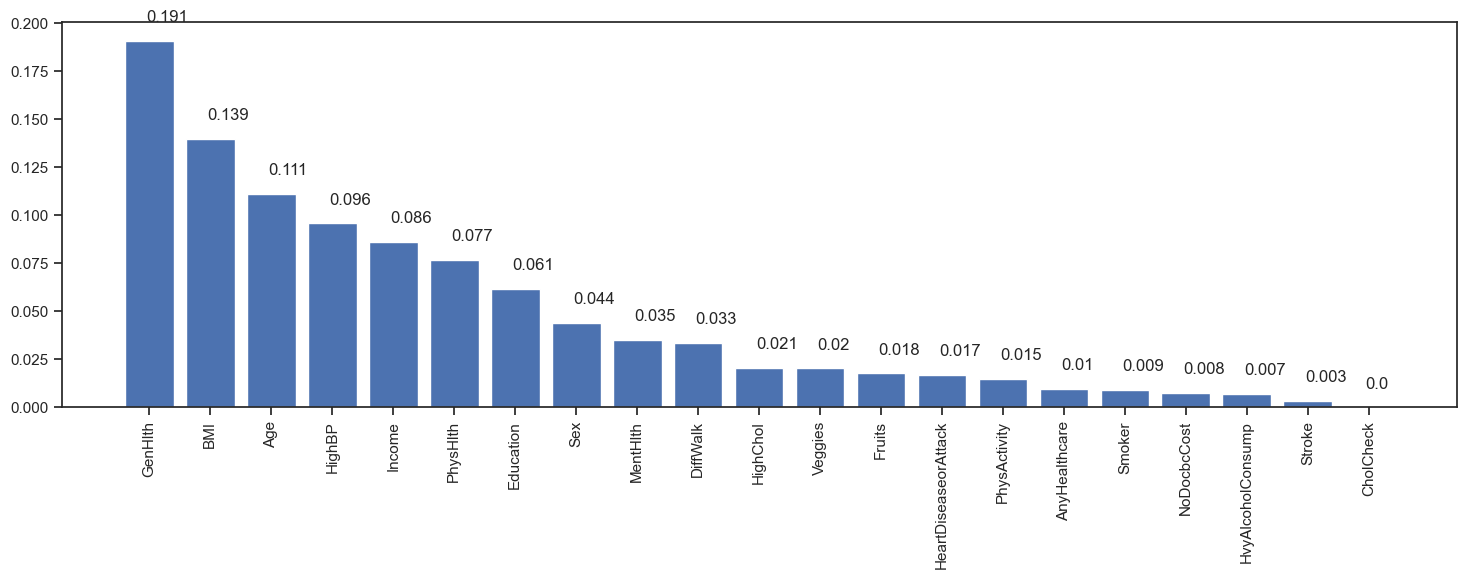

In [20]:
TLabelsSort, DTValuesSort = draw_feature_importances(DT1, X)

[Text(0.5, 0.875, 'GenHlth <= 2.5\ngini = 0.5\nsamples = 1400\nvalue = [701.0, 699.0]'),
 Text(0.25, 0.625, 'HighBP <= 0.5\ngini = 0.372\nsamples = 543\nvalue = [409, 134]'),
 Text(0.125, 0.375, 'Age <= 7.5\ngini = 0.197\nsamples = 307\nvalue = [273, 34]'),
 Text(0.0625, 0.125, 'gini = 0.079\nsamples = 171\nvalue = [164, 7]'),
 Text(0.1875, 0.125, 'gini = 0.318\nsamples = 136\nvalue = [109, 27]'),
 Text(0.375, 0.375, 'DiffWalk <= 0.5\ngini = 0.488\nsamples = 236\nvalue = [136, 100]'),
 Text(0.3125, 0.125, 'gini = 0.47\nsamples = 214\nvalue = [133, 81]'),
 Text(0.4375, 0.125, 'gini = 0.236\nsamples = 22\nvalue = [3, 19]'),
 Text(0.75, 0.625, 'HighBP <= 0.5\ngini = 0.449\nsamples = 857\nvalue = [292, 565]'),
 Text(0.625, 0.375, 'Age <= 6.5\ngini = 0.491\nsamples = 269\nvalue = [153.0, 116.0]'),
 Text(0.5625, 0.125, 'gini = 0.372\nsamples = 81\nvalue = [61, 20]'),
 Text(0.6875, 0.125, 'gini = 0.5\nsamples = 188\nvalue = [92.0, 96.0]'),
 Text(0.875, 0.375, 'Age <= 6.5\ngini = 0.361\nsample

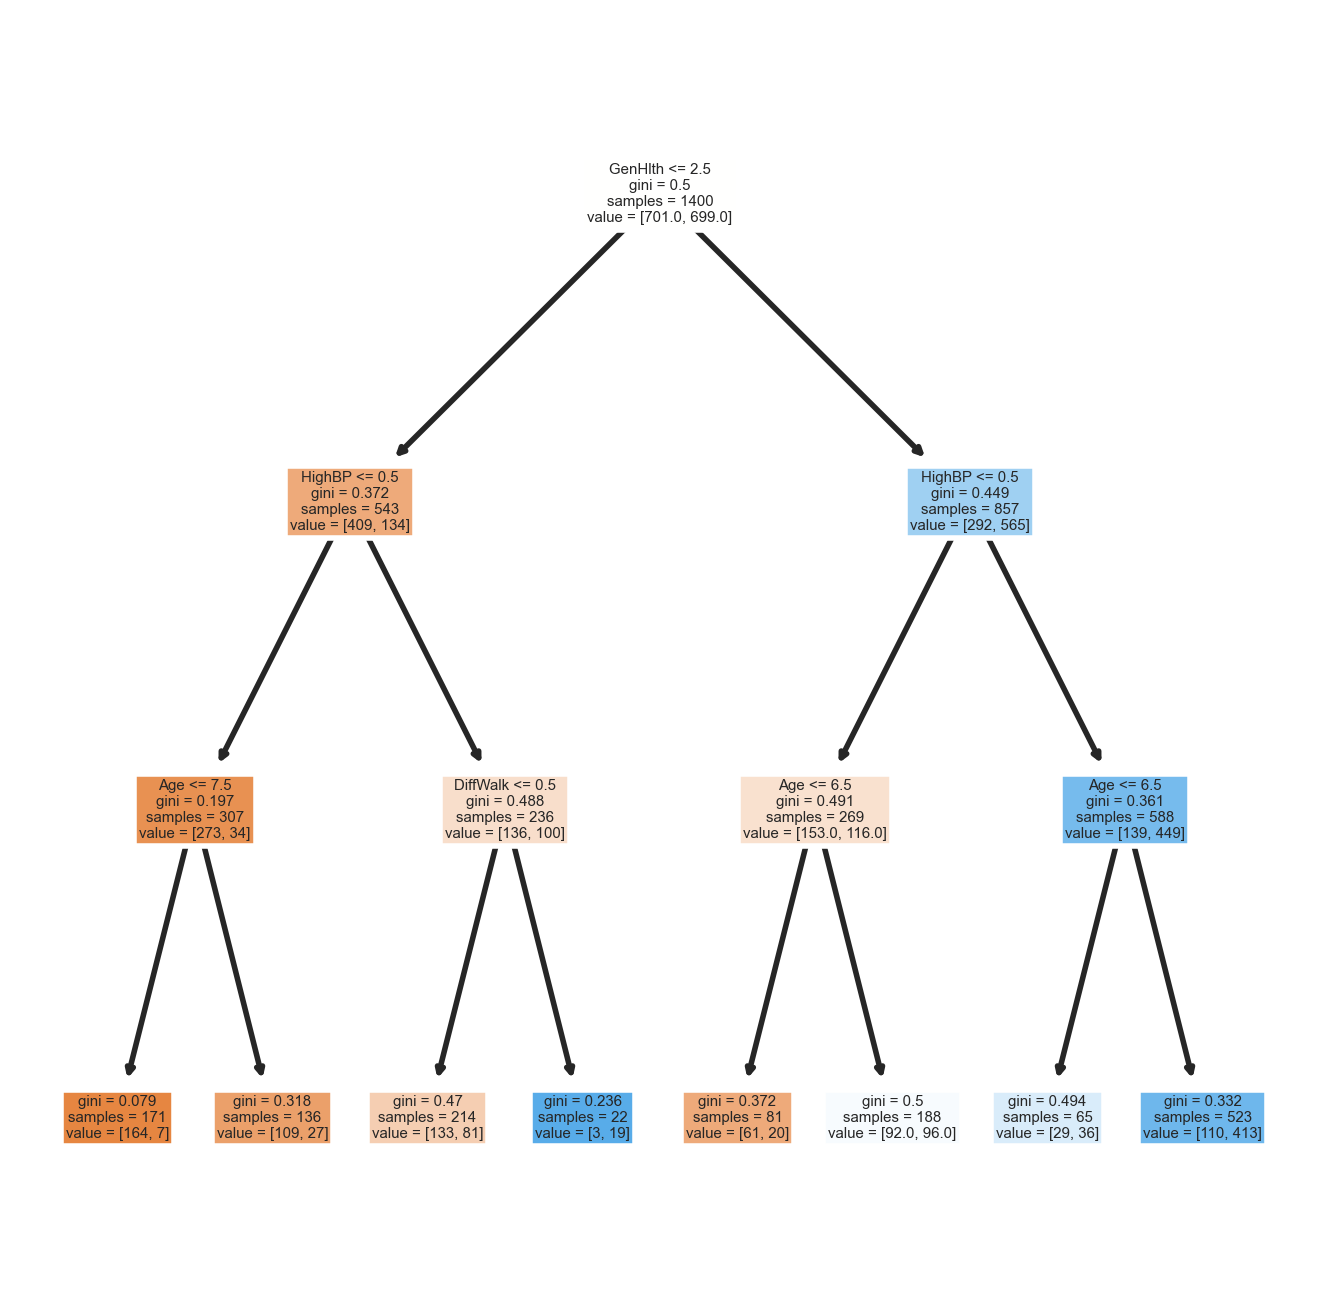

In [21]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 1)
clf.fit(X_train, Y_train)
tree.plot_tree(clf, filled = True,feature_names = X.columns.values)